In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.__version__

'2.1.3'

In [6]:
pd.__version__

'2.2.3'

In [7]:
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [8]:
wages_df = pd.read_csv('zarobki.csv', encoding='cp1250', sep=";")

wages_df.head()

,Województwo,Średnie zarobki brutto
0,Dolnośląskie,7200
1,Kujawsko-Pomorskie,6000
2,Lubelskie,5700
3,Lubuskie,5800
4,Łódzkie,6100


In [9]:
wages_df.rename(columns={
    "Średnie zarobki brutto": "zarobki",
    "Województwo": "wojewodztwo"
}, inplace=True)

In [10]:
wages_df.wojewodztwo

0            Dolnośląskie
1      Kujawsko-Pomorskie
2               Lubelskie
3                Lubuskie
4                 Łódzkie
5             Malopolskie
6             Mazowieckie
7                Opolskie
8            Podkarpackie
9               Podlaskie
10              Pomorskie
11                Śląskie
12         Świętokrzyskie
13    Warmińsko-Mazurskie
14          Wielkopolskie
15     Zachodniopomorskie
Name: wojewodztwo, dtype: object

In [11]:
wages_df.zarobki

0     7200
1     6000
2     5700
3     5800
4     6100
5     6500
6     8500
7     5900
8     5600
9     5700
10    6900
11    6400
12    5800
13    5600
14    6300
15    6000
Name: zarobki, dtype: int64

In [12]:
price_of_flats_df = pd.read_csv('ceny_mieszkan.csv', encoding='cp1250', sep=';')

price_of_flats_df

,Województwo,Średnia cena za m2 (PLN)
0,Dolnośląskie,9500
1,Kujawsko-Pomorskie,7200
2,Lubelskie,6500
3,Lubuskie,6400
4,Łódzkie,6700
5,Małopolskie,9800
6,Mazowieckie,12000
7,Opolskie,7100
8,Podkarpackie,6000
9,Podlaskie,6200


In [13]:
price_of_flats_df.rename(columns={
    "Województwo": "wojewodztwo",
    "Średnia cena za m2 (PLN)": "cena"
}, inplace=True)

In [14]:
price_of_flats_df.wojewodztwo

0            Dolnośląskie
1      Kujawsko-Pomorskie
2               Lubelskie
3                Lubuskie
4                 Łódzkie
5             Małopolskie
6             Mazowieckie
7                Opolskie
8            Podkarpackie
9               Podlaskie
10              Pomorskie
11                Śląskie
12         Świętokrzyskie
13    Warmińsko-Mazurskie
14          Wielkopolskie
15     Zachodniopomorskie
Name: wojewodztwo, dtype: object

In [15]:
price_of_flats_df.cena

0      9500
1      7200
2      6500
3      6400
4      6700
5      9800
6     12000
7      7100
8      6000
9      6200
10    10500
11     7400
12     6300
13     6100
14     7600
15     7300
Name: cena, dtype: int64

In [16]:
df = pd.merge(wages_df, price_of_flats_df, on='wojewodztwo')

df

,wojewodztwo,zarobki,cena
0,Dolnośląskie,7200,9500
1,Kujawsko-Pomorskie,6000,7200
2,Lubelskie,5700,6500
3,Lubuskie,5800,6400
4,Łódzkie,6100,6700
5,Mazowieckie,8500,12000
6,Opolskie,5900,7100
7,Podkarpackie,5600,6000
8,Podlaskie,5700,6200
9,Pomorskie,6900,10500


In [17]:
df.zarobki.mean()

np.float64(6233.333333333333)

In [18]:
df.describe()

,zarobki,cena
count,15.00,15.00
mean,"6,233.33","7,520.00"
std,780.72,"1,767.65"
min,"5,600.00","6,000.00"
25%,"5,750.00","6,350.00"
50%,"6,000.00","7,100.00"
75%,"6,350.00","7,500.00"
max,"8,500.00","12,000.00"


In [19]:
df.zarobki.agg(['mean', 'max', 'min'])

mean   6,233.33
max    8,500.00
min    5,600.00
Name: zarobki, dtype: float64

In [20]:
df.zarobki.median()

6000.0

In [21]:
df.cena.agg(['mean', 'max', 'min'])

mean    7,520.00
max    12,000.00
min     6,000.00
Name: cena, dtype: float64

In [22]:
df.cena.median()

7100.0

In [23]:
df[["wojewodztwo", "zarobki"]].sort_values('zarobki', ascending=True).head(2)

,wojewodztwo,zarobki
7,Podkarpackie,5600
12,Warmińsko-Mazurskie,5600


In [24]:
df[["wojewodztwo", "zarobki"]].sort_values('zarobki', ascending=False).head(1)

,wojewodztwo,zarobki
5,Mazowieckie,8500


In [74]:
df[["wojewodztwo", "cena"]].sort_values('cena', ascending=True).head(1)

,wojewodztwo,cena
7,Podkarpackie,6000


In [72]:
df[["wojewodztwo", "cena"]].sort_values('cena', ascending=False).head(1)

,wojewodztwo,cena
5,Mazowieckie,12000


In [27]:
df["Roczny przychód brutto"] = (df.zarobki * 12)

df

,wojewodztwo,zarobki,cena,Roczny przychód brutto
0,Dolnośląskie,7200,9500,86400
1,Kujawsko-Pomorskie,6000,7200,72000
2,Lubelskie,5700,6500,68400
3,Lubuskie,5800,6400,69600
4,Łódzkie,6100,6700,73200
5,Mazowieckie,8500,12000,102000
6,Opolskie,5900,7100,70800
7,Podkarpackie,5600,6000,67200
8,Podlaskie,5700,6200,68400
9,Pomorskie,6900,10500,82800


In [28]:
df['Ile m2 można kupić za roczną pensję brutto'] = ((df.zarobki * 12) / df.cena)

df

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto
0,Dolnośląskie,7200,9500,86400,9.09
1,Kujawsko-Pomorskie,6000,7200,72000,10.00
2,Lubelskie,5700,6500,68400,10.52
3,Lubuskie,5800,6400,69600,10.88
4,Łódzkie,6100,6700,73200,10.93
5,Mazowieckie,8500,12000,102000,8.50
6,Opolskie,5900,7100,70800,9.97
7,Podkarpackie,5600,6000,67200,11.20
8,Podlaskie,5700,6200,68400,11.03
9,Pomorskie,6900,10500,82800,7.89


In [29]:
df.sort_values("Ile m2 można kupić za roczną pensję brutto")

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto
9,Pomorskie,6900,10500,82800,7.89
5,Mazowieckie,8500,12000,102000,8.50
0,Dolnośląskie,7200,9500,86400,9.09
14,Zachodniopomorskie,6000,7300,72000,9.86
13,Wielkopolskie,6300,7600,75600,9.95
6,Opolskie,5900,7100,70800,9.97
1,Kujawsko-Pomorskie,6000,7200,72000,10.00
10,Śląskie,6400,7400,76800,10.38
2,Lubelskie,5700,6500,68400,10.52
3,Lubuskie,5800,6400,69600,10.88


In [30]:
df.sort_values("Ile m2 można kupić za roczną pensję brutto").head()

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto
9,Pomorskie,6900,10500,82800,7.89
5,Mazowieckie,8500,12000,102000,8.50
0,Dolnośląskie,7200,9500,86400,9.09
14,Zachodniopomorskie,6000,7300,72000,9.86
13,Wielkopolskie,6300,7600,75600,9.95


In [31]:
df.sort_values("Ile m2 można kupić za roczną pensję brutto", ascending=False)

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto
7,Podkarpackie,5600,6000,67200,11.20
11,Świętokrzyskie,5800,6300,69600,11.05
8,Podlaskie,5700,6200,68400,11.03
12,Warmińsko-Mazurskie,5600,6100,67200,11.02
4,Łódzkie,6100,6700,73200,10.93
3,Lubuskie,5800,6400,69600,10.88
2,Lubelskie,5700,6500,68400,10.52
10,Śląskie,6400,7400,76800,10.38
1,Kujawsko-Pomorskie,6000,7200,72000,10.00
6,Opolskie,5900,7100,70800,9.97


In [32]:
df.sort_values("Ile m2 można kupić za roczną pensję brutto", ascending=False).head()

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto
7,Podkarpackie,5600,6000,67200,11.20
11,Świętokrzyskie,5800,6300,69600,11.05
8,Podlaskie,5700,6200,68400,11.03
12,Warmińsko-Mazurskie,5600,6100,67200,11.02
4,Łódzkie,6100,6700,73200,10.93


Text(0.5, 0, 'Województwo')

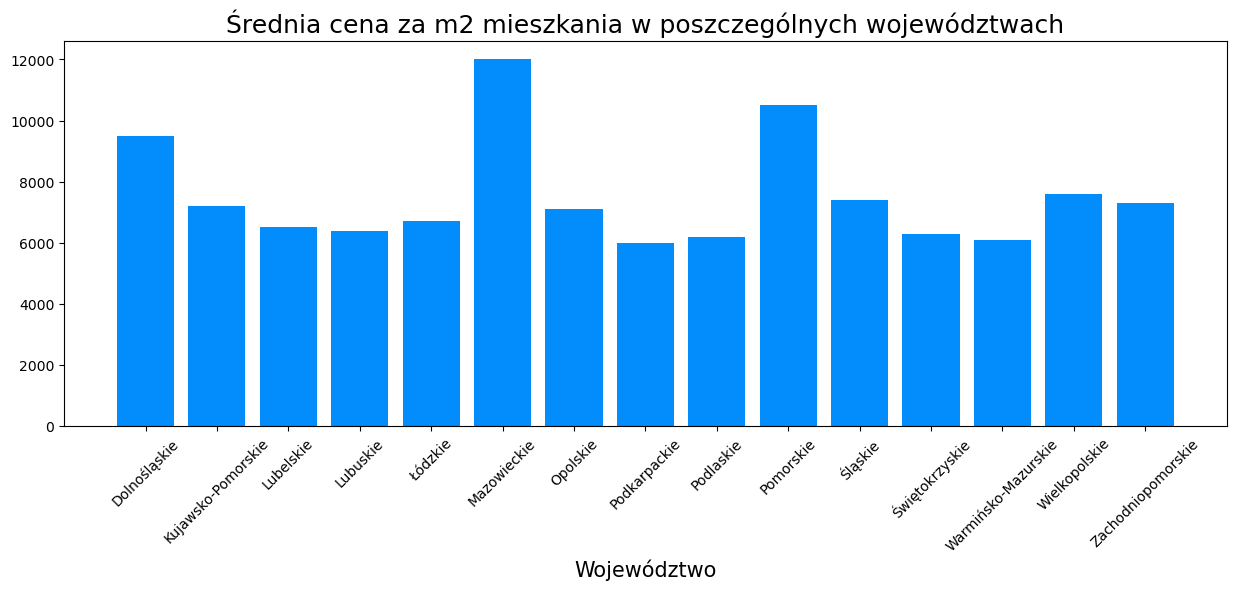

In [33]:
price = df["cena"]

x_pos = df["wojewodztwo"]

plt.figure(figsize=(15,5))

plt.xticks(rotation=45)

plt.bar(x_pos, price, color = "#038cfc")

plt.title("Średnia cena za m2 mieszkania w poszczególnych województwach", fontsize=18)

plt.xlabel("Województwo", fontsize=15)

Text(0.5, 0, 'Województwo')

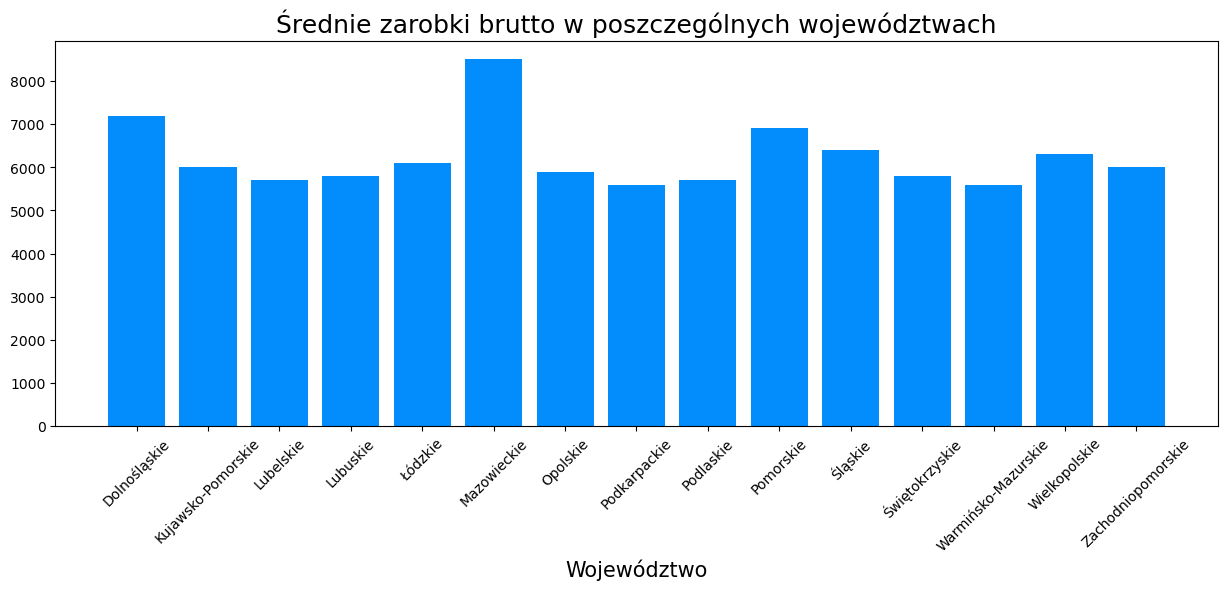

In [34]:
wage = df["zarobki"]

x_pos = df["wojewodztwo"]

plt.figure(figsize=(15,5))

plt.xticks(rotation=45)

plt.bar(x_pos, wage, color = "#038cfc")

plt.title("Średnie zarobki brutto w poszczególnych województwach", fontsize=18)

plt.xlabel("Województwo", fontsize=15)

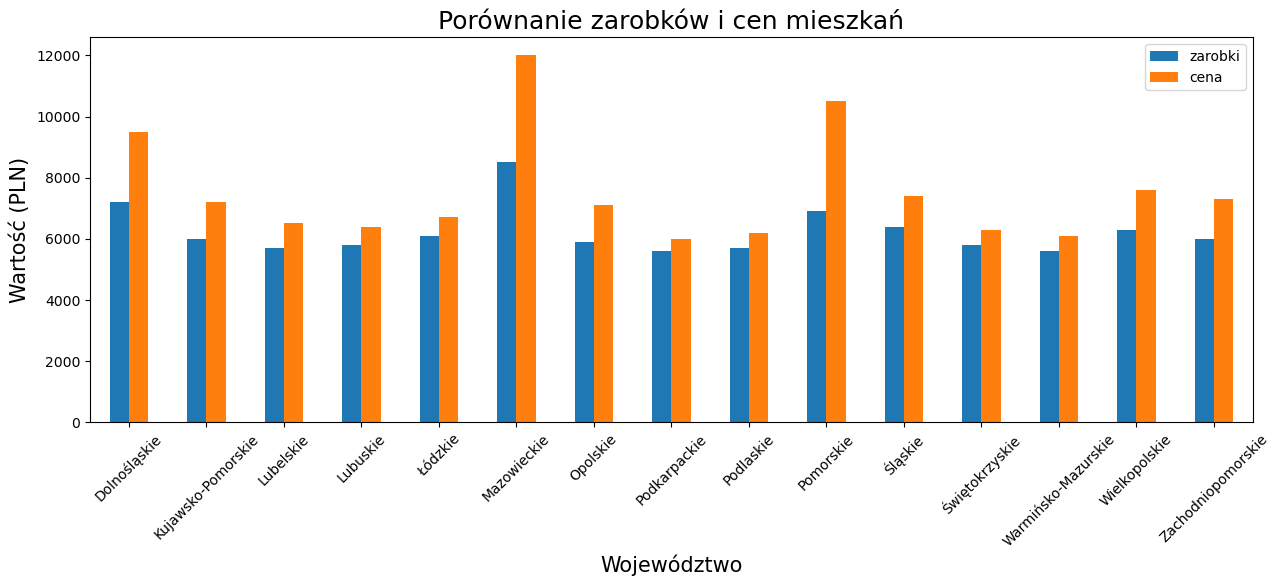

In [35]:
df.plot(
    x="wojewodztwo",
    y=["zarobki", "cena"],
    kind="bar",
    figsize=(15,5)
)

plt.title("Porównanie zarobków i cen mieszkań", fontsize=18)
plt.xlabel("Województwo", fontsize=15)
plt.ylabel("Wartość (PLN)", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [39]:
df["cena_do_zarobkow"] = df["cena"] / df["zarobki"]

In [40]:
df

,wojewodztwo,zarobki,cena,Roczny przychód brutto,Ile m2 można kupić za roczną pensję brutto,cena_do_zarobkow
0,Dolnośląskie,7200,9500,86400,9.09,1.32
1,Kujawsko-Pomorskie,6000,7200,72000,10.00,1.20
2,Lubelskie,5700,6500,68400,10.52,1.14
3,Lubuskie,5800,6400,69600,10.88,1.10
4,Łódzkie,6100,6700,73200,10.93,1.10
5,Mazowieckie,8500,12000,102000,8.50,1.41
6,Opolskie,5900,7100,70800,9.97,1.20
7,Podkarpackie,5600,6000,67200,11.20,1.07
8,Podlaskie,5700,6200,68400,11.03,1.09
9,Pomorskie,6900,10500,82800,7.89,1.52


In [46]:
df[["wojewodztwo", "zarobki", "cena", "cena_do_zarobkow"]].sort_values("cena_do_zarobkow").head(3)

,wojewodztwo,zarobki,cena,cena_do_zarobkow
7,Podkarpackie,5600,6000,1.07
11,Świętokrzyskie,5800,6300,1.09
8,Podlaskie,5700,6200,1.09


In [45]:
df[["wojewodztwo", "zarobki", "cena", "cena_do_zarobkow"]].sort_values("cena_do_zarobkow", ascending=False).head(3)

,wojewodztwo,zarobki,cena,cena_do_zarobkow
9,Pomorskie,6900,10500,1.52
5,Mazowieckie,8500,12000,1.41
0,Dolnośląskie,7200,9500,1.32


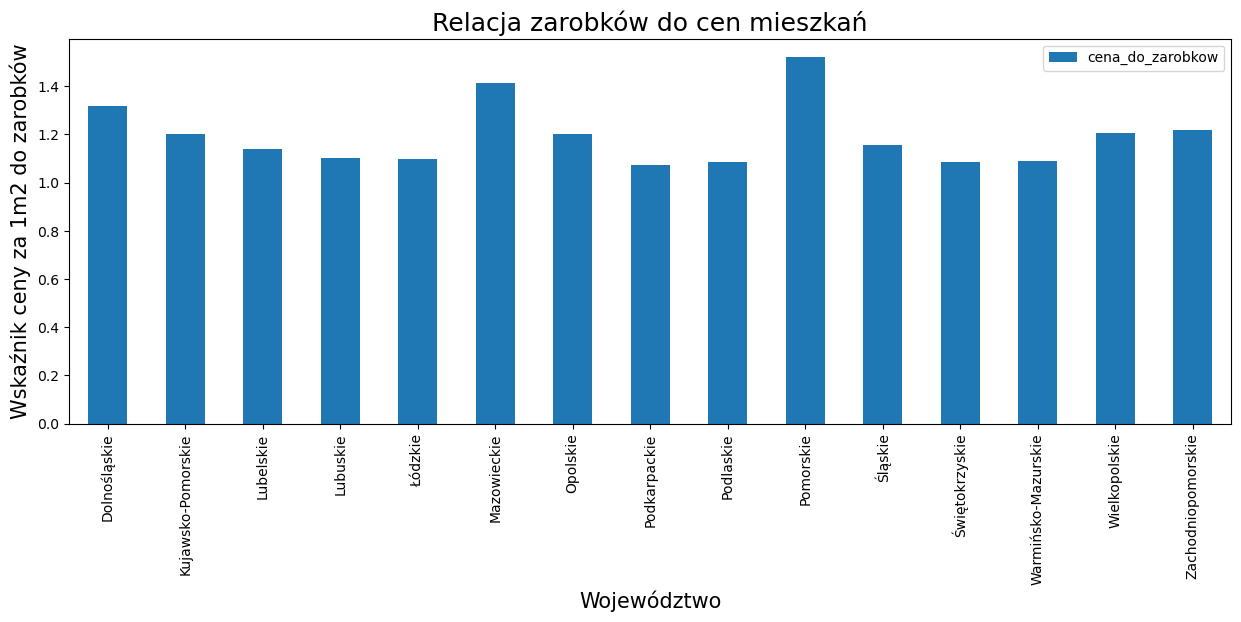

In [80]:
df.plot(
    x="wojewodztwo",
    y=["cena_do_zarobkow"],
    kind="bar",
    figsize=(15,5)
)

plt.title("Relacja zarobków do cen mieszkań", fontsize=18)
plt.xlabel("Województwo", fontsize=15)
plt.ylabel("Wskaźnik ceny za 1m2 do zarobków", fontsize=15)
plt.show()

In [81]:
df[["wojewodztwo", "cena_do_zarobkow"]].sort_values("cena_do_zarobkow").head(3)

,wojewodztwo,cena_do_zarobkow
7,Podkarpackie,1.07
11,Świętokrzyskie,1.09
8,Podlaskie,1.09


In [82]:
df[["wojewodztwo", "cena_do_zarobkow"]].sort_values("cena_do_zarobkow").tail(3)

,wojewodztwo,cena_do_zarobkow
0,Dolnośląskie,1.32
5,Mazowieckie,1.41
9,Pomorskie,1.52


Wnioski:
1. Zarobki
    - Najwyższe zarobki są w województwie mazowieckim.
    - Najniższe zarobki są w województwach podkarpackim i warmińsko-mazurskim.
2. Ceny mieszkań
    - Najdroższe mieszkania są również w województwie mazowieckim
    - Najtańsze mieszknia są w województwie podkarpackim
3. Relacja ceny mieszkań do zarobków
Analiza wskaźnika cena mieszkania / średnie zarobki brutto pokazuje:
Najbardziej dostępne mieszkania:
    - Podkarpackie - ~1.07 pensji/m2
    - Świętokrzystkie - ~1.09 pensji/m2
    - Podlaskie - ~1.09 pensji/m2
Najmniej dostępne mieszkania:
    - Dolnoślaskie - ~1.32 pensji/m2
    - Mazowieckie - ~1.41 pensji/m2
    - Pomorskie - ~1.52 pensji/m2
Podsumowanie:
- W województwach podkarpackim, świętokrzyskim i podlaskim mieszkania są relatywnie najbardziej dostępne w stosunku do zarobków.
- W województwach dolnośląskim, mazowieckim i pomorskim sytuacja jest najtrudniejsza – mieszkania są najmniej dostępne.
- Ogólnie analiza pokazuje, że w Polsce występują duże różnice regionalne: wysokie zarobki w dużych miastach nie zawsze idą w parze z dostępnością mieszkań.